In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def  match_histograms(input_image,Href, nref=0):
    img = cv2.imread(input_image)#read image
    img = img[:,:,1]
    Href = (Href - Href.min()) * 255 / nref # re-normalize the cdf
    Href = Href.astype('uint8')# apply Href to img
    plt.plot(Href)
    img_new = Href[flat] # get the value from cumulative sum for every index in flat, and set that as img_new
    img_new = np.reshape(img_new, img.shape) # transform img
    output = input_image + "-histeq.png"
    cv2.imwrite(output, img_new)# save image
    return img_new


In [38]:
img = cv2.imread('./car.png')
img = img[:,:,1] # change to gray scale image
img = np.asarray(img) # convert image into a numpy array

flat = img.flatten() # put pixels in a 1D array by flattening out img array
histogram = np.zeros(256) # array with size of 256, set to zeros
for pixel in img:
    histogram[pixel] += 1

In [39]:
a = iter(histogram) # doing cumulative sum
cs = [next(a)]
for i in a:
    cs.append(cs[-1] + i)
cs = np.array(cs) #set list to array

In [40]:
N = cs.max() - cs.min() # nref

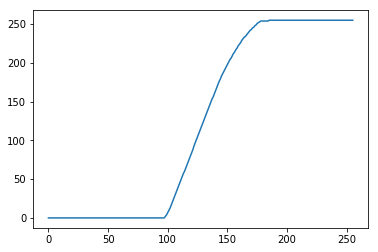

In [41]:
trans = match_histograms('./car.png',cs,N)

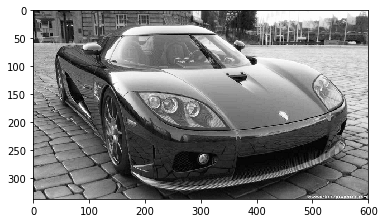

In [42]:
plt.imshow(trans, cmap='gray')